### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

### Loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving US Airlines Tweets.csv to US Airlines Tweets.csv


In [ ]:
df = pd.read_csv("US Airlines Tweets.csv")

### Data Pre-Processing

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Checking the shape of the dataframe 

print("The shape of this dataframe is",df.shape)

The shape of this dataframe is (14640, 15)


In [ ]:
# Finding the number of missing values in each column of the dataframe

print("The count of null values in each column of this dataframe is \n")
(df.isna().sum())

The count of null values in each column of this dataframe is 



tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# Better approach would be to determine the percentage of null values of each column.

print("The percentage of null or missing values in each column of this dataframe is \n")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

The percentage of null or missing values in each column of this dataframe is 



tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**Insights: The three columns having more than 90% of missing values i.e 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord' will not contribute to determine the dependent variable 'airline_sentiment' and therefore should be deleted.**

In [ ]:
df.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace=True)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 12)

**The three columns have been dropped successfully who had more than 90% missing values.**

In [ ]:
# Checking data type of each column in our dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


In [ ]:
# Checking unique values in each column of the dataframe.

df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

**The 'tweet_created' column has a datatype of object when it contains values regarding the time and date of the tweet created and hence this colum has to be converted to a datetime datatype with only the date information retained and not the time.**

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'], format='%Y-%m-%d').dt.date

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   name                          14640 non-null  object        
 7   retweet_count                 14640 non-null  int64         
 8   text                          14640 non-null  object        
 9   tweet_created                 14640 non-null  datetime64[ns]
 10  tweet_location                9907 non-null   object        
 11  user_timezone               

In [ ]:
# Checking the earliest and latest date of a tweet in our dataframe.

print(df['tweet_created'].min())
print(df['tweet_created'].max())

2015-02-16 00:00:00
2015-02-24 00:00:00


**We have tweets of the US Airlines from 16th February 2015 to 24th February 2015 i.e. 9 days.**

In [ ]:
# To confirm our above statement, can find the unique values in the 'tweet_created' column.

df['tweet_created'].nunique()

9

In [ ]:
# Finding the number of tweets on each of the nine days.

tweets_count = df.groupby('tweet_created').size()
tweets_count

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

### Data Exploration and Visualization

#### Count of tweets for each sentiment type

Text(0.5, 1.0, 'Count of tweets for each Sentiment Type')

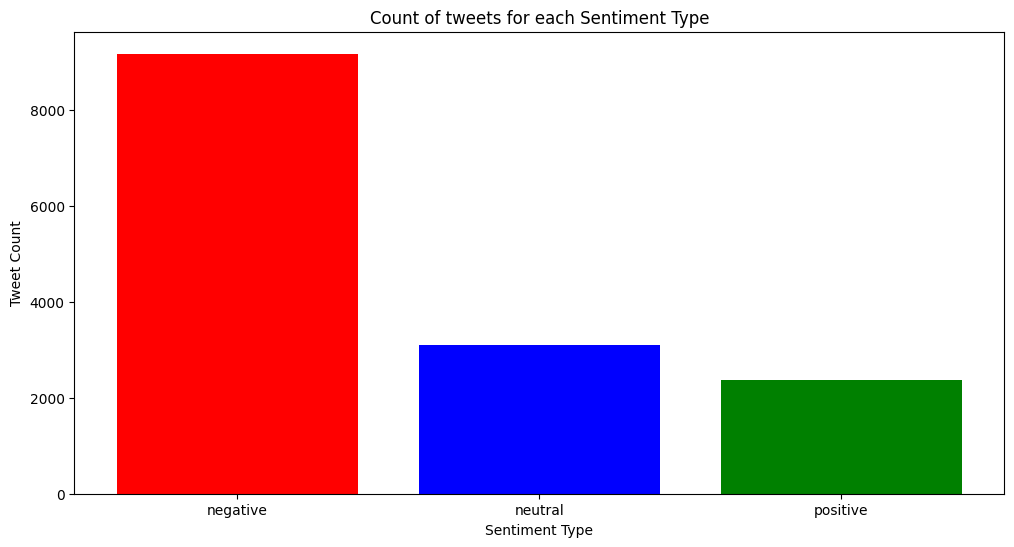

In [ ]:
import matplotlib.pyplot as plt

i = [1,2,3]
count = df.airline_sentiment.value_counts()

plt.figure(1,figsize=(12,6))
plt.bar(i,count,color=['red','blue','green'])

plt.xticks(i,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Tweet Count')
plt.title('Count of tweets for each Sentiment Type')

#### Count of tweets displaying a particular sentiment for each of the US Airlines

In [ ]:
# Displaying the different US airlines in our dataset.
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
print("Count of tweets for each of the US airlines \n\n ",
(df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)))

Count of tweets for each of the US airlines 

  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


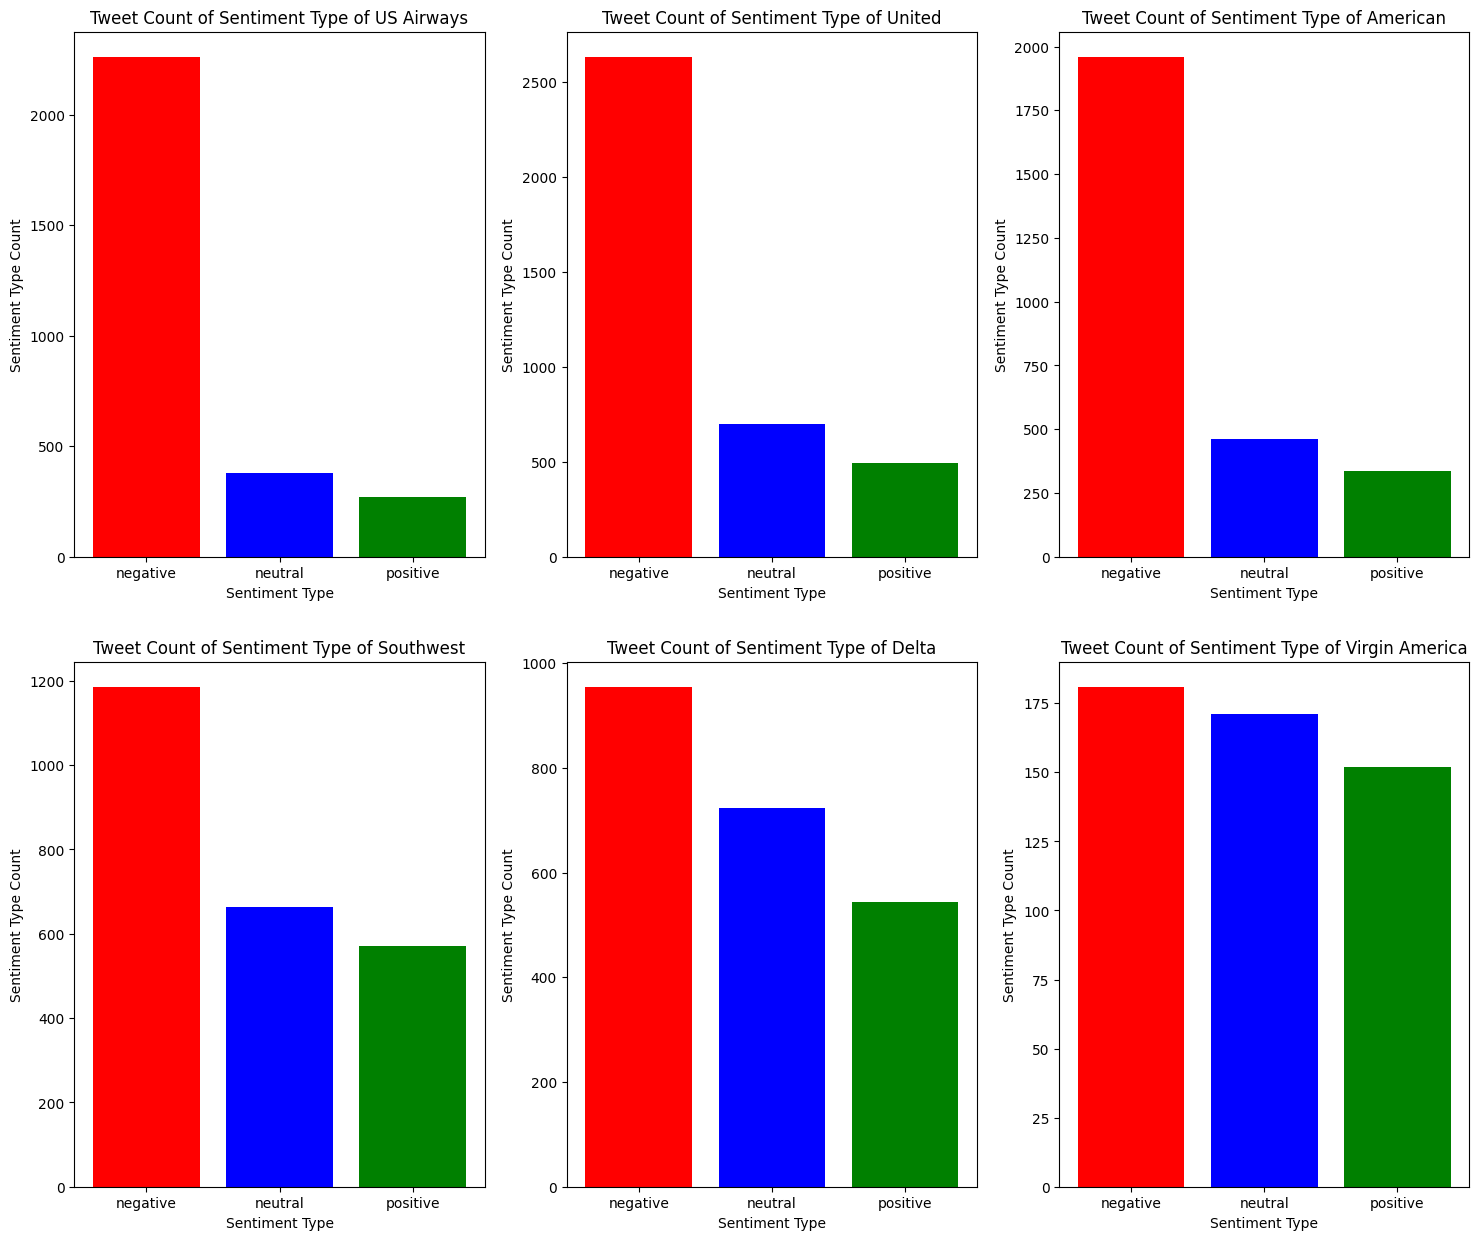

In [ ]:
us_airlines = ['US Airways','United','American','Southwest','Delta','Virgin America']

plt.figure(1,figsize=(18, 15))
for i in us_airlines:
    indices= us_airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    counter=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,counter, color=['red', 'blue', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiment Type Count')
    plt.xlabel('Sentiment Type')
    plt.title('Tweet Count of Sentiment Type of '+i)

**In light of recent experiences, it appears that many individuals are not enjoying their flights as much as they used to. As a result, it is crucial to identify which airlines are excelling at satisfying their customers and which are falling short. To accomplish this, we will analyze the proportion of negative reviews for each airline.**

#### Percentage of Negative Reviews for each US airlines

In [ ]:
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()
negative_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]

my_dict = {'American':negative_tweets[0] / total_tweets[0],
           'Delta':negative_tweets[3] / total_tweets[1],
           'Southwest': negative_tweets[6] / total_tweets[2],
           'US Airways': negative_tweets[9] / total_tweets[3],
           'United': negative_tweets[12] / total_tweets[4],
           'Virgin': negative_tweets[15] / total_tweets[5]}

percentage_negative = pd.DataFrame.from_dict(my_dict, orient = 'index')
percentage_negative.columns = ['Percent Negative']

print(percentage_negative)

            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


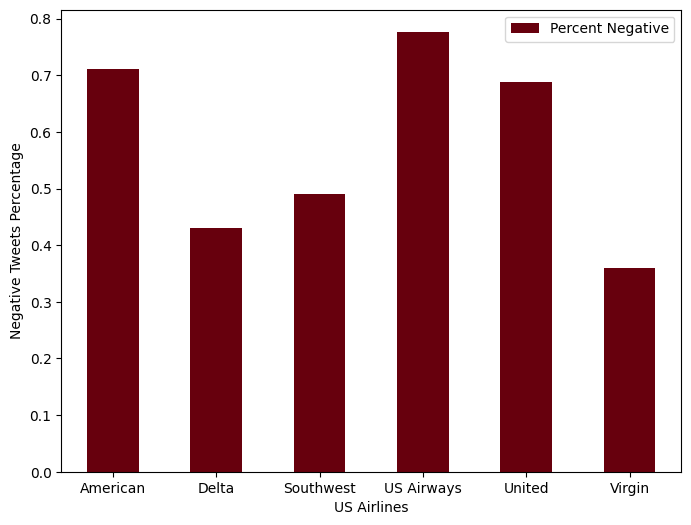

In [ ]:
ax = percentage_negative.plot(kind = 'bar', rot=0, colormap = 'Reds_r', figsize = (8,6))
ax.set_xlabel('US Airlines')
ax.set_ylabel('Negative Tweets Percentage')
plt.show()

1. Southwest Airline has the most balanced reviews in terms of sentiment of the customers experience.

2. US Airways have around 80% of negative sentiment from the customers flying in their airlines.

3. Among the 6 airlines, Virgin Airlines seems to be the best in terms of sentiments from the customers.

#### Stack Bar Plot for each of the US airlines with every sentiment

In [ ]:
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
print(figure_2)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


<Axes: xlabel='airline'>

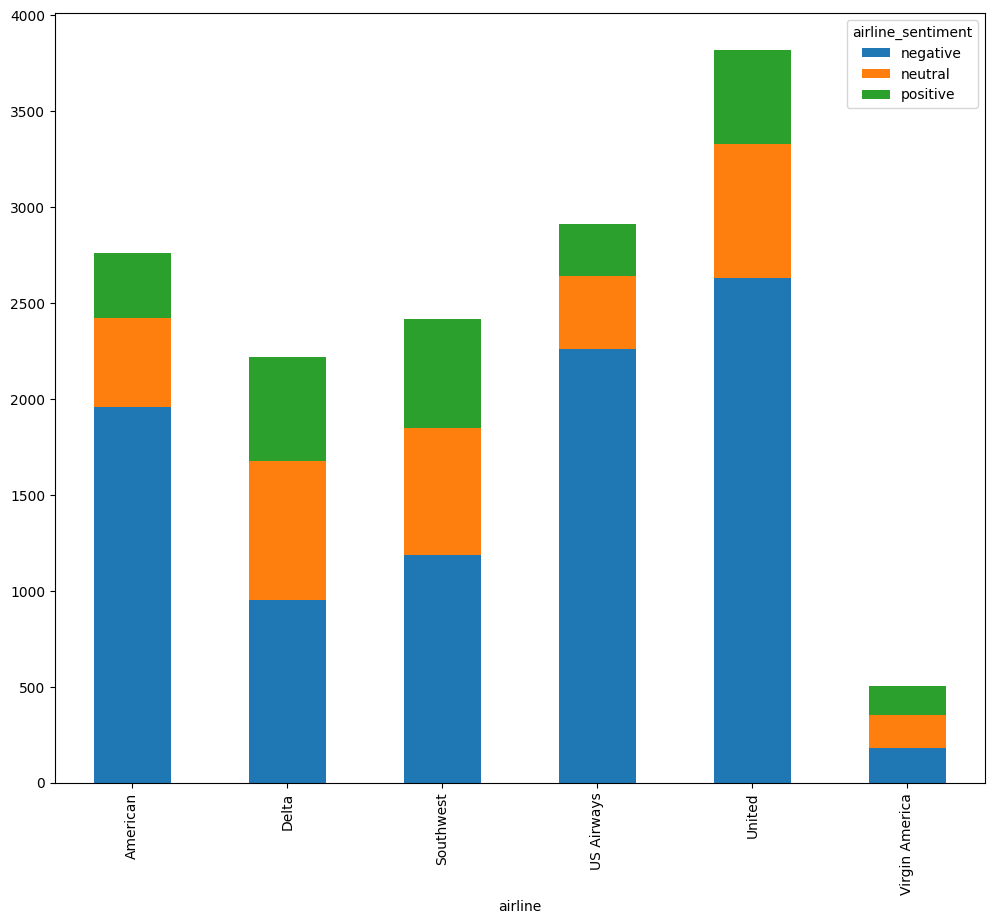

In [ ]:
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(12,10))

#### 10 Complaint Reasons for each of the US Airlines

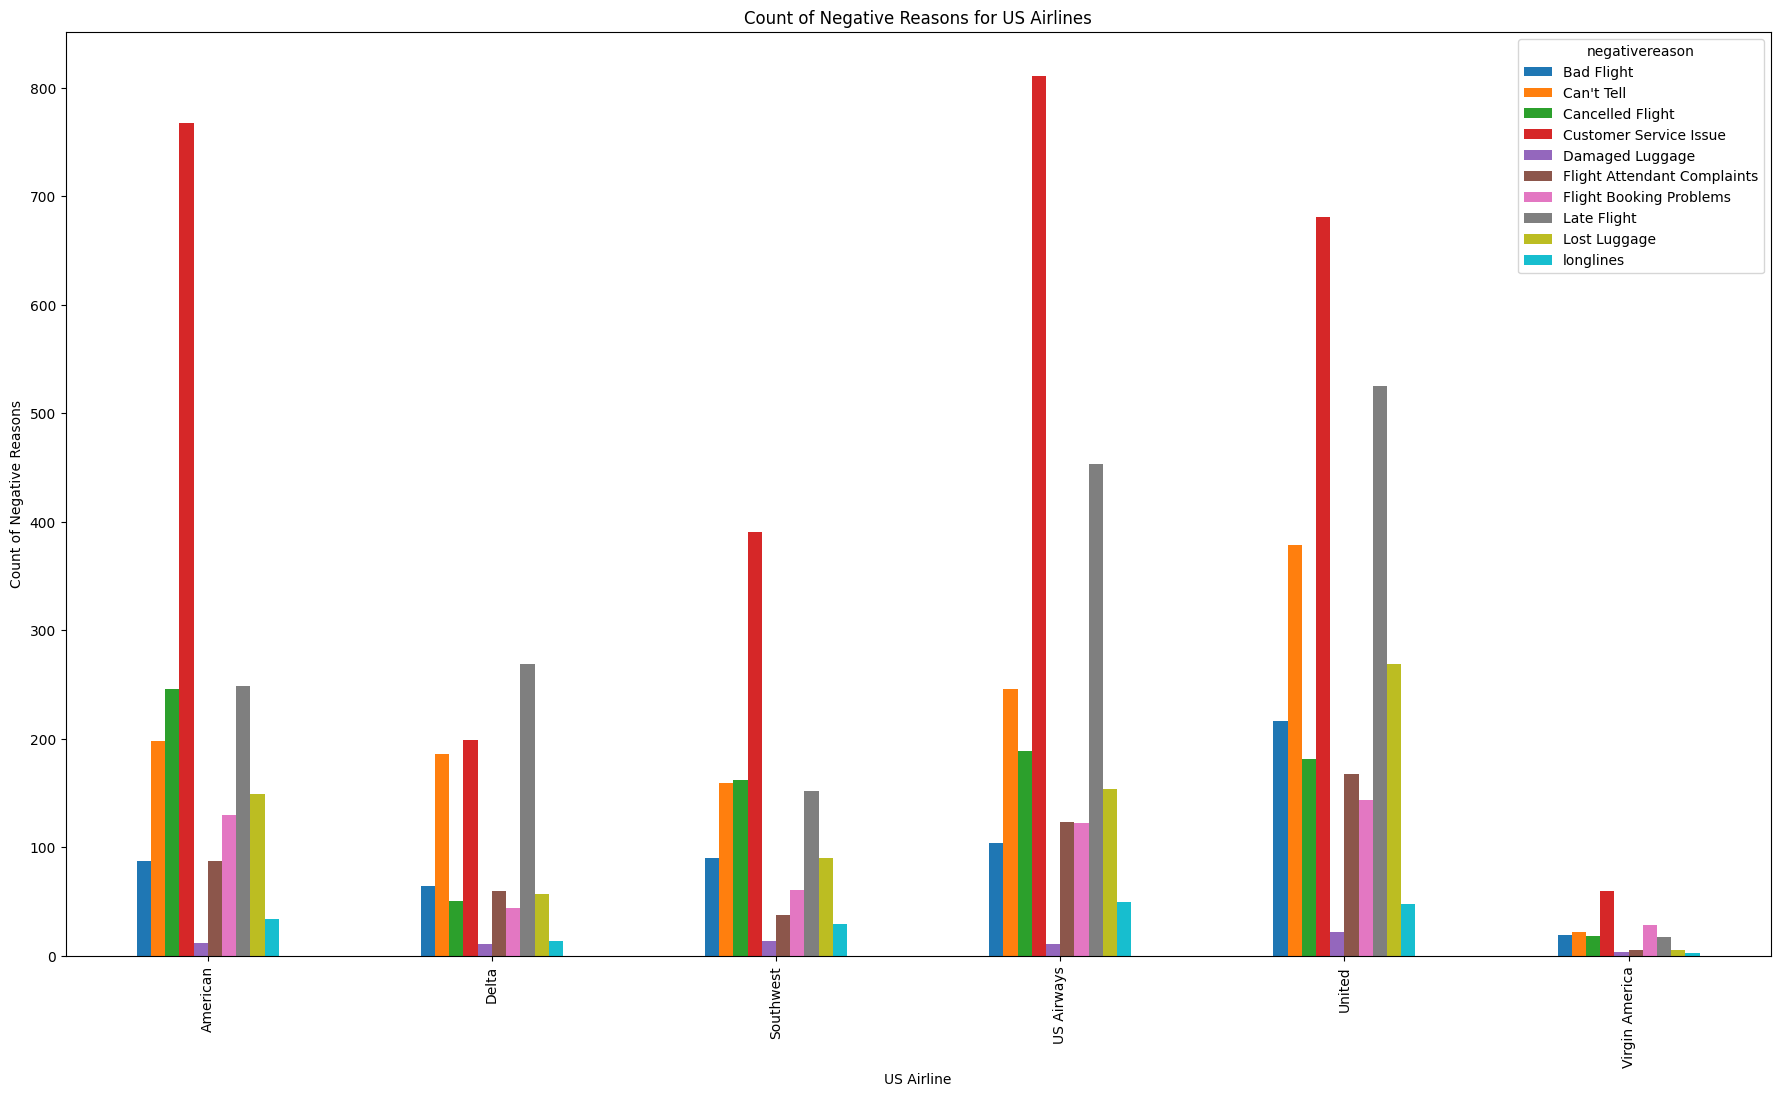

In [ ]:
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('US Airline')
plt.ylabel('Count of Negative Reasons')
plt.title("Count of Negative Reasons for US Airlines")
plt.show()

#### Exploring the negative sentiment column in our dataframe, we aim to uncover the underlying reasons behind negative tweets directed towards each airline.

In [ ]:
# Count of Unique Negative Reasons
df['negativereason'].nunique()

10

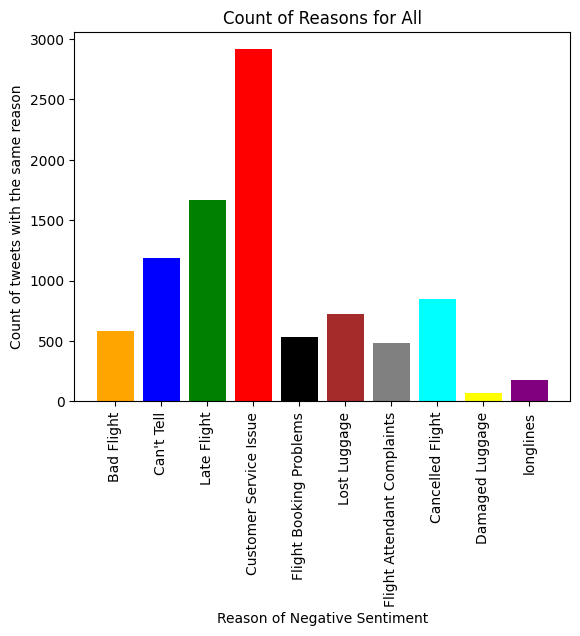

In [ ]:
NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['orange','blue','green','red', 'black','brown','gray','cyan','yellow','purple'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count of tweets with the same reason')
    plt.xlabel('Reason of Negative Sentiment')
    plt.title('Count of Reasons for '+Airline)

plot_reason('All')

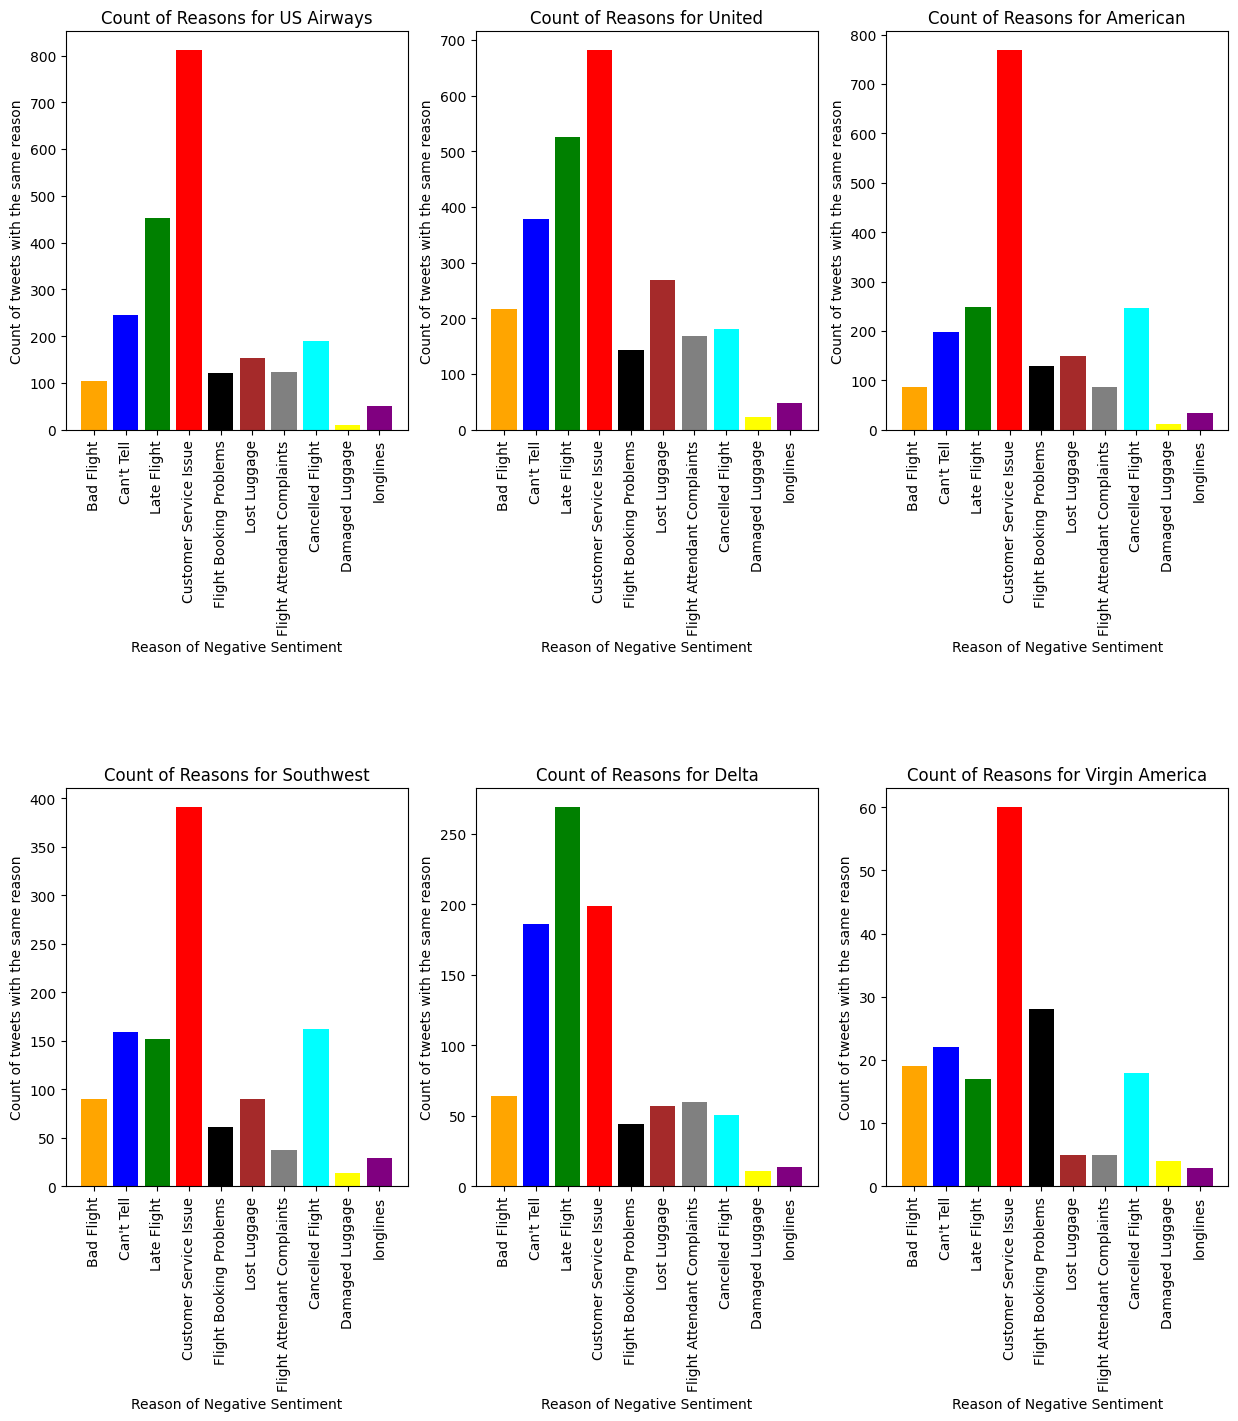

In [ ]:
plt.figure(2,figsize=(15, 15))
for i in us_airlines:
    indices= us_airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

1. Delta Airline's main reason for negative sentiment is **Late Flight**.

2. The main reason for negative sentiment for US Airways, United, American, Southwest, Virgin America is **Customer Service Issue**.

3. **Virgin America Airline's** highest count for each of the negative sentiment reason is not more than 60.

4. Unlike Virgin America, airlines such as **United Airline, US Airways, and American Airline** are burdened with over than 500 count of negative sentiments, ranging from delayed flights to poor customer service.

#### Relationship between the Date and Negative Sentiment

By visualizing the date's impact on tweet sentiments (especially negative ones!), we can derive diverse conclusions. It'll be captivating to observe whether the date influences the tone of tweets.

In [ ]:
date = df.reset_index()

# Converting the date column to datetime using pandas.
date.tweet_created = pd.to_datetime(date.tweet_created)

# Using on the date component of the datetime function
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()

day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

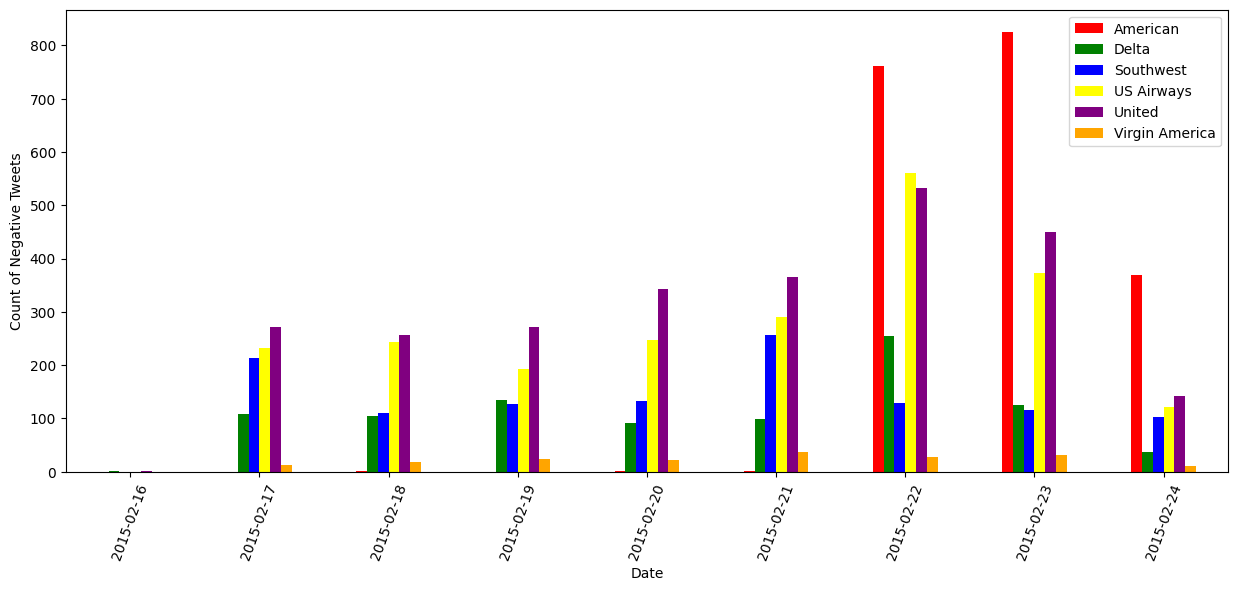

In [ ]:
day_df = day_df.loc(axis=0)[:,:,'negative']


ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']

ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Count of Negative Tweets')
plt.show()

1. The rest of the airlines had a slightly higher proportion of negative tweets towards the end of the week.

2. In contrast, Virgin America had the fewest negative tweets compared to other airlines in the weekly data, which could be due to their significantly lower total number of tweets.

3. On February 23rd, 2015, there was a sudden surge in negative sentiment tweets directed at American, but it decreased by half on the following day. Hopefully, American has since improved their customer service issues. 

### Model Exploration and Model Selection

#### Creating functions to automate work for all models

In [ ]:
# Importing important libraries

import re, nltk

nltk.download('punkt')
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, naive_bayes
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, f1_score, confusion_matrix, accuracy_score, precision_recall_curve, auc, roc_curve

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# This function is used to clean the tweet via tokenizing the tweet. For this usecase I will be using tokens from the second index as the first index contains
# airline name and '@' symbol. Then I will lower the capitilization of the tokend and rejoining them into a sentence.

def cleaning_tweet(text):
  tokens = nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

In [ ]:
# This function is used to remove all punctuation marks and stop words. It then finally joins then words to form a clean string.

def text_processing(msg):
  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat, average='weighted', labels=np.unique(yhat), zero_division=1), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class, zero_division=1)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
  print()
  print('Area under Precision-Recall curve:', lr_f1)
  
  fpr, tpr, _ = roc_curve(y_test, test_probs)

  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc

#### Processing the text and Creating the Final dataframe.

In [ ]:
# Removing neutral tweets and applying the cleaning tweet function and creating a new column called 'cleaned_tweet'.

df = df[df['airline_sentiment'] != 'neutral']
df['cleaned_tweet'] = df['text'].apply(cleaning_tweet)

df.head()

<ipython-input-39-d69d6d80d7d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_tweet'] = df['text'].apply(cleaning_tweet)


,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [ ]:
# Encoding the airline_sentiment column to 0 for negative and 1 for positive.

df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df.head()

<ipython-input-40-59b96155290f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)


,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [ ]:
# Using the 'text_processing' function to remove punctuation marks

df.loc[:, 'cleaned_tweet'] = df['cleaned_tweet'].apply(text_processing)
df.reset_index(drop=True, inplace = True)
df.head()

<ipython-input-41-dc159267079d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cleaned_tweet'] = df['cleaned_tweet'].apply(text_processing)


,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),added commercials experience tacky
1,3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
2,4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),really big bad thing
3,5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
4,6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [ ]:
# Creating an object of TF-IDF Vectorizer and splitting the dataset into training and testing data

vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tfidf = vectorizer.fit_transform(df.cleaned_tweet)

In [ ]:
# Converting the sparse matrix created by the TF-IDF vectorizer to a pandas dataframe where the 

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.head()

,aa,aaadvantage,aacustomerservice,aadelay,aadv,aadvantage,aafail,aal,aaron,aarp,...,zukes,zurich,zut,zv,zvfmxnuelj,zvhco,zwmuoon,zy,zz,zzps
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Shape of the dataset which was created by the TF-IDF Vectorizer.

df_tfidf.shape

(11541, 10776)

In [ ]:
# Merging the TF-IDF dataframe and the columns most important in the original dataframe except airline_sentiment column since that is the output variable.

columns_to_merge = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'airline_sentiment']
final_df = pd.concat([df_tfidf, df[columns_to_merge]], axis=1)
final_df.head()

,aa,aaadvantage,aacustomerservice,aadelay,aadv,aadvantage,aafail,aal,aaron,aarp,...,zvfmxnuelj,zvhco,zwmuoon,zy,zz,zzps,airline_sentiment_confidence,negativereason_confidence,retweet_count,airline_sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3486,0.0000,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.7033,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,1.0000,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.6842,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.6745,0.0000,0,1


In [ ]:
final_df.shape

(11541, 10780)

In [ ]:
# Checking for NAN values and their count in the dataframe.

nan_rows = pd.isna(final_df).any(axis=1).sum()
nan_rows

2033

In [ ]:
# Dropping the rows that contain the NAN values.

final_df.dropna(inplace=True)
final_df.shape

(9508, 10780)

In [ ]:
# Splitting the final dataframe into training and testing dataframe

X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Multinomial Naive Bayes Classifier Model

Train confusion matrix is: 
[[6426    0]
 [ 156   73]]

Test confusion matrix is: 
[[2751    1]
 [  97    4]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2752
           1       0.80      0.04      0.08       101

    accuracy                           0.97      2853
   macro avg       0.88      0.52      0.53      2853
weighted avg       0.96      0.97      0.95      2853


Train accuracy score:  0.9765589782118708
Test accuracy score:  0.9656501927795303

Train ROC-AUC score:  0.9999626245452087
Test ROC-AUC score:  0.9882641607183974

Area under Precision-Recall curve: 0.950389990013822
Area under ROC-AUC: 0.7542942976348606


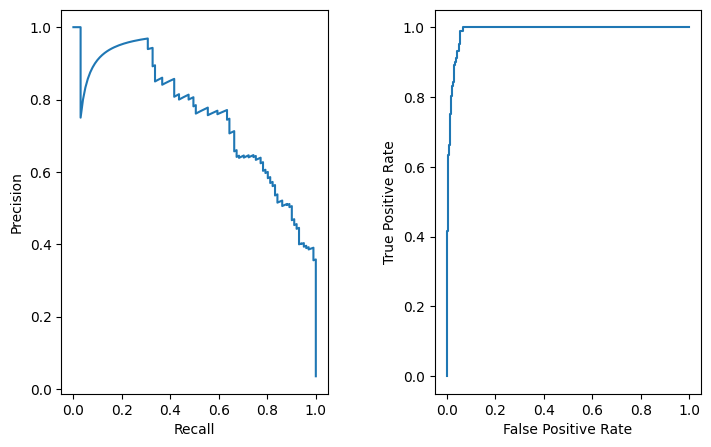

In [ ]:
# Using the function created earlier called 'check scores'.

mnb_train_accuracy, mnb_test_accuracy, mnb_train_auc, mnb_test_auc = check_scores(MultinomialNB(alpha = 0.1).fit(X_train, y_train), 
                                                                                  X_train, X_test, y_train, y_test)

#### Random Forest Classifier Model

Train confusion matrix is: 
[[6426    0]
 [   0  229]]

Test confusion matrix is: 
[[2752    0]
 [   7   94]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       1.00      0.93      0.96       101

    accuracy                           1.00      2853
   macro avg       1.00      0.97      0.98      2853
weighted avg       1.00      1.00      1.00      2853


Train accuracy score:  1.0
Test accuracy score:  0.997546442341395

Train ROC-AUC score:  1.0
Test ROC-AUC score:  0.9998866710798987

Area under Precision-Recall curve: 0.9975039623654067
Area under ROC-AUC: 0.9971647164716472


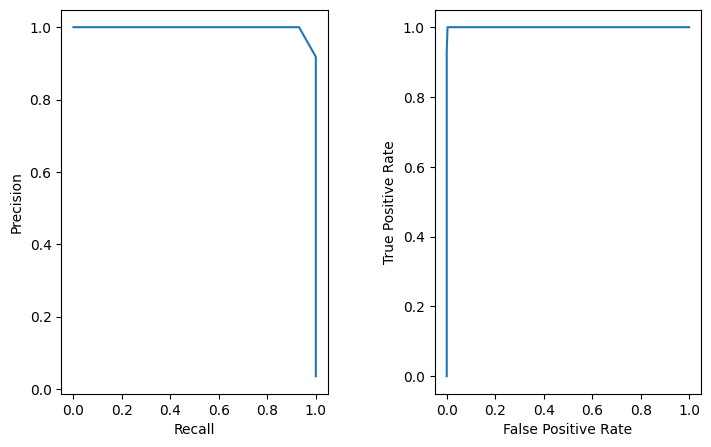

In [ ]:
rf_train_accuracy, rf_test_accuracy, rf_train_auc, rf_test_auc= check_scores(RandomForestClassifier(n_estimators = 5).fit(X_train, y_train), 
                                                                             X_train,X_test,y_train,y_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Train confusion matrix is: 
[[6426    0]
 [   0  229]]

Test confusion matrix is: 
[[2752    0]
 [   0  101]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       1.00      1.00      1.00       101

    accuracy                           1.00      2853
   macro avg       1.00      1.00      1.00      2853
weighted avg       1.00      1.00      1.00      2853


Train accuracy score:  1.0
Test accuracy score:  1.0

Train ROC-AUC score:  1.0
Test ROC-AUC score:  1.0

Area under Precision-Recall curve: 1.0
Area under ROC-AUC: 1.0


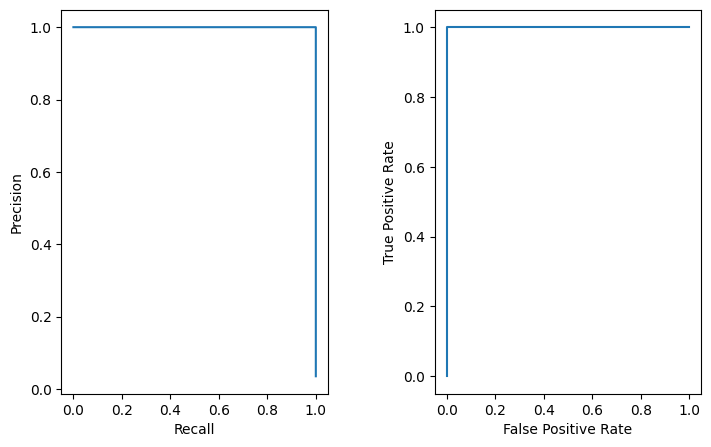

In [ ]:
lr_train_accuracy, lr_test_accuracy, lr_train_auc, lr_test_auc= check_scores(LogisticRegression().fit(X_train, y_train), 
                                                                             X_train,X_test,y_train,y_test)

#### K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Train confusion matrix is: 
[[6425    1]
 [   5  224]]

Test confusion matrix is: 
[[2752    0]
 [  90   11]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2752
           1       1.00      0.11      0.20       101

    accuracy                           0.97      2853
   macro avg       0.98      0.55      0.59      2853
weighted avg       0.97      0.97      0.96      2853


Train accuracy score:  0.9990984222389181
Test accuracy score:  0.9684542586750788

Train ROC-AUC score:  0.9999096193547773
Test ROC-AUC score:  0.9985429138844117

Area under Precision-Recall curve: 0.9560333949188784
Area under ROC-AUC: 0.9635463546354636


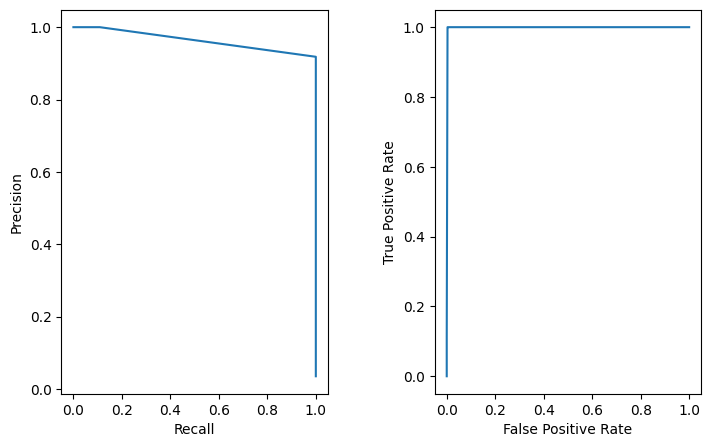

In [ ]:
knn_train_accuracy, knn_test_accuracy, knn_train_auc, knn_test_auc = check_scores(KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train), 
                                                                             X_train,X_test,y_train,y_test)

#### Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

Train confusion matrix is: 
[[6426    0]
 [   0  229]]

Test confusion matrix is: 
[[2752    0]
 [   0  101]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       1.00      1.00      1.00       101

    accuracy                           1.00      2853
   macro avg       1.00      1.00      1.00      2853
weighted avg       1.00      1.00      1.00      2853


Train accuracy score:  1.0
Test accuracy score:  1.0

Train ROC-AUC score:  1.0
Test ROC-AUC score:  1.0

Area under Precision-Recall curve: 1.0
Area under ROC-AUC: 1.0


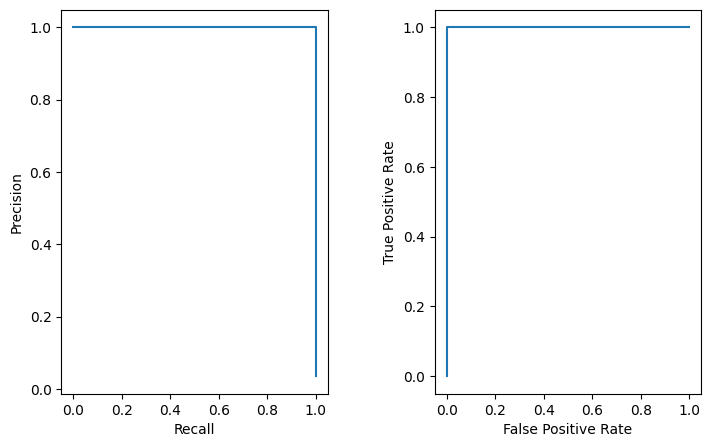

In [ ]:
svm_train_accuracy, svm_test_accuracy, svm_train_auc, svm_test_auc = check_scores(SVC(kernel='linear', probability=True).fit(X_train, y_train), 
                                                                             X_train,X_test,y_train,y_test)